In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import generate_network
import matplotlib.image as mpimg
where_data = "/home/piotrek/Distance_correlation_data/network_backgrounds/"

In [2]:
def plot_corr_matrix(df, alpha1=0.15, alpha2=0.5, s=40, bins=10, color_set={"color": "darkblue", "cmap":"Blues", "edgecolor":"w"}):
    # Create a pair grid instance
    grid = sns.PairGrid(df);

    def corrfunc(x, y, **kwargs):
        r = np.corrcoef(x, y)[0][1]
        ax = plt.gca()
        ax.annotate(r"$\rho$ = {:.1f}".format(r),
                    xy=(.1, .85), xycoords=ax.transAxes)
        
    grid = grid.map_upper(plt.scatter, color = color_set["color"],  alpha=alpha2, s=s);
    grid = grid.map_diag(plt.hist, bins = bins, edgecolor =  color_set["edgecolor"], color = 'darkblue');
    grid = grid.map_lower(corrfunc);
    grid = grid.map_lower(sns.kdeplot, cmap = color_set["cmap"], shade=True);    
    return grid.fig

In [3]:
for net in [1, 2, 3, 4]:
    for samples in [10, 30, 50]:
        for parametrization in ["linear", "quadratic", "sin"]:
            network = f"net{net}-{samples}-{parametrization}"
            df = pd.read_csv(where_data + f"net{net}/data_for_net{net}-{samples}-{parametrization}.csv", index_col=0)
            with open(where_data + "summaries/" + network + ".csv", "w+") as f:
                df.describe().loc[["mean", "std", "min", "50%", "max"]].to_csv(f, float_format='%.2f')
            sns.set("paper")
            sns.set_style("white")
            fig = plot_corr_matrix(df, s = 10, bins=10, alpha2 = 0.20)
            fig.set_size_inches(5,5)
            plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0.15, bottom=0.15)
            for ax in fig.axes:
                plt.sca(ax)
                plt.xticks(rotation=90)
            plt.savefig(where_data + "plots/" + network + ".png")
            plt.close()

In [5]:
for net in [1, 2, 3, 4]:
    for samples in [150]:
        for parametrization in ["linear", "quadratic", "sin"]:
            network = f"net{net}-{samples}-{parametrization}"
            df = pd.read_csv(where_data + f"net{net}/data_for_net{net}-{samples}-{parametrization}.csv", index_col=0)
            with open(where_data + "summaries/" + network + ".csv", "w+") as f:
                df.describe().loc[["mean", "std", "min", "50%", "max"]].to_csv(f, float_format='%.2f')
            sns.set("paper")
            sns.set_style("white")
            fig = plot_corr_matrix(df, s = 10, bins=10, alpha2 = 0.20)
            fig.set_size_inches(5,5)
            plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0.15, bottom=0.15)
            for ax in fig.axes:
                plt.sca(ax)
                plt.xticks(rotation=90)
            plt.savefig(where_data + "plots/" + network + ".png")
            plt.close()

# Generate reference distributions

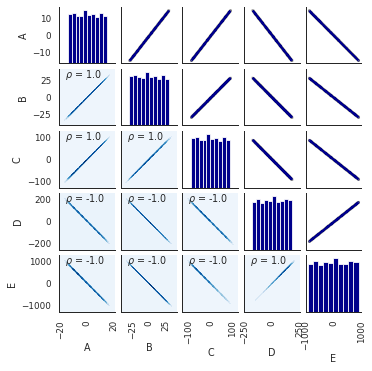

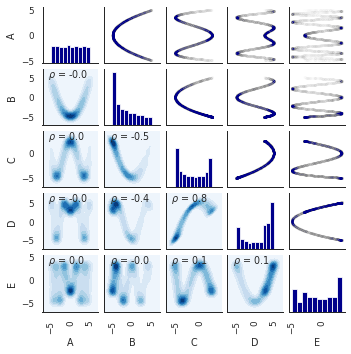

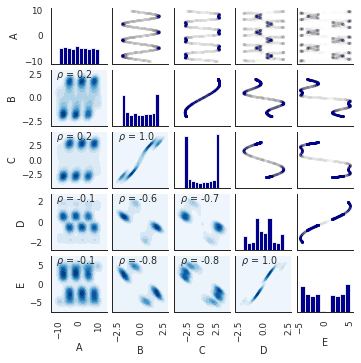

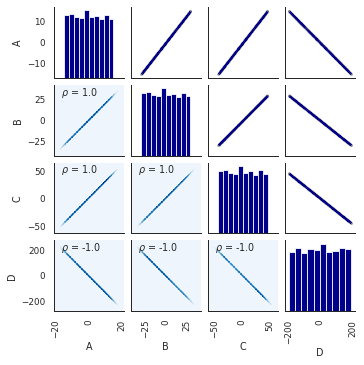

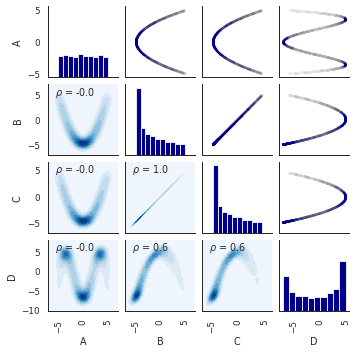

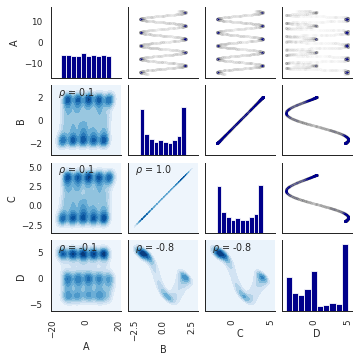

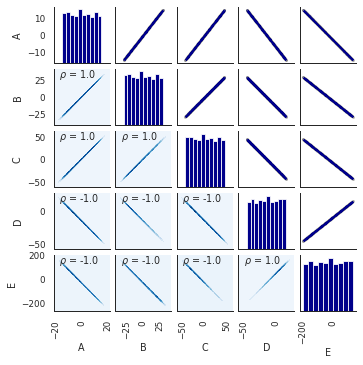

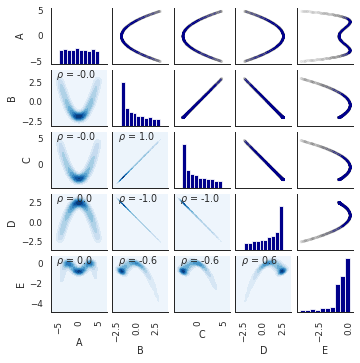

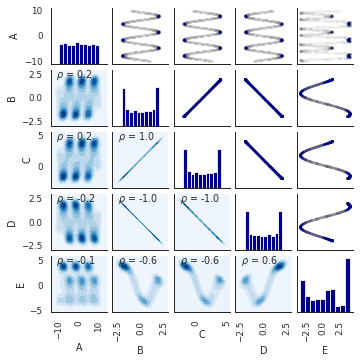

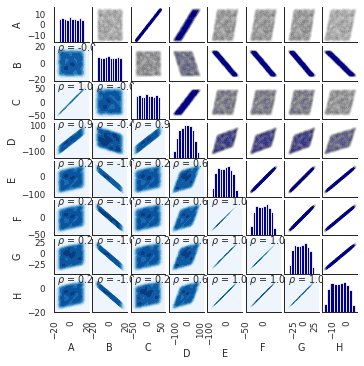

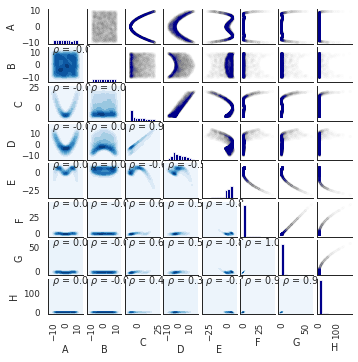

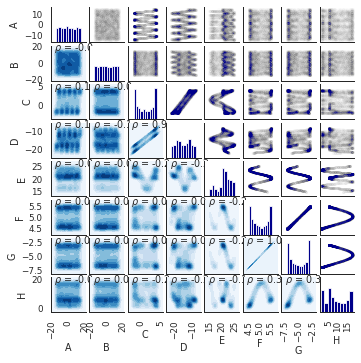

In [4]:
for net in [1, 2, 3, 4]:
    for samples in [50]:
        for parametrization in ["linear", "quadratic", "sin"]:
            network = f"net{net}-{samples}-{parametrization}"
            network_spec = generate_network.from_file_to_network_spec(f"{network}.txt")
            network_spec["nsamp"] = 5000
            df = generate_network.create_clean_data(network_spec)
            df = generate_network.add_noise(df, network_spec["noise_mean"], 0.01)
            with open(where_data + "summaries/" + network + ".csv", "w+") as f:
                df.describe().loc[["mean", "std", "min", "50%", "max"]].to_csv(f, float_format='%.2f')
            sns.set("paper")
            sns.set_style("white")
            fig = plot_corr_matrix(df, s = 5, bins=10, alpha2 = 0.005)
            fig.set_size_inches(5,5)
            plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0.15, bottom=0.15)
            for ax in fig.axes:
                plt.sca(ax)
                plt.xticks(rotation=90)
            network = f"net{net}-reference-{parametrization}"
            plt.savefig(where_data + "plots/" + network + ".png")
            plt.close()

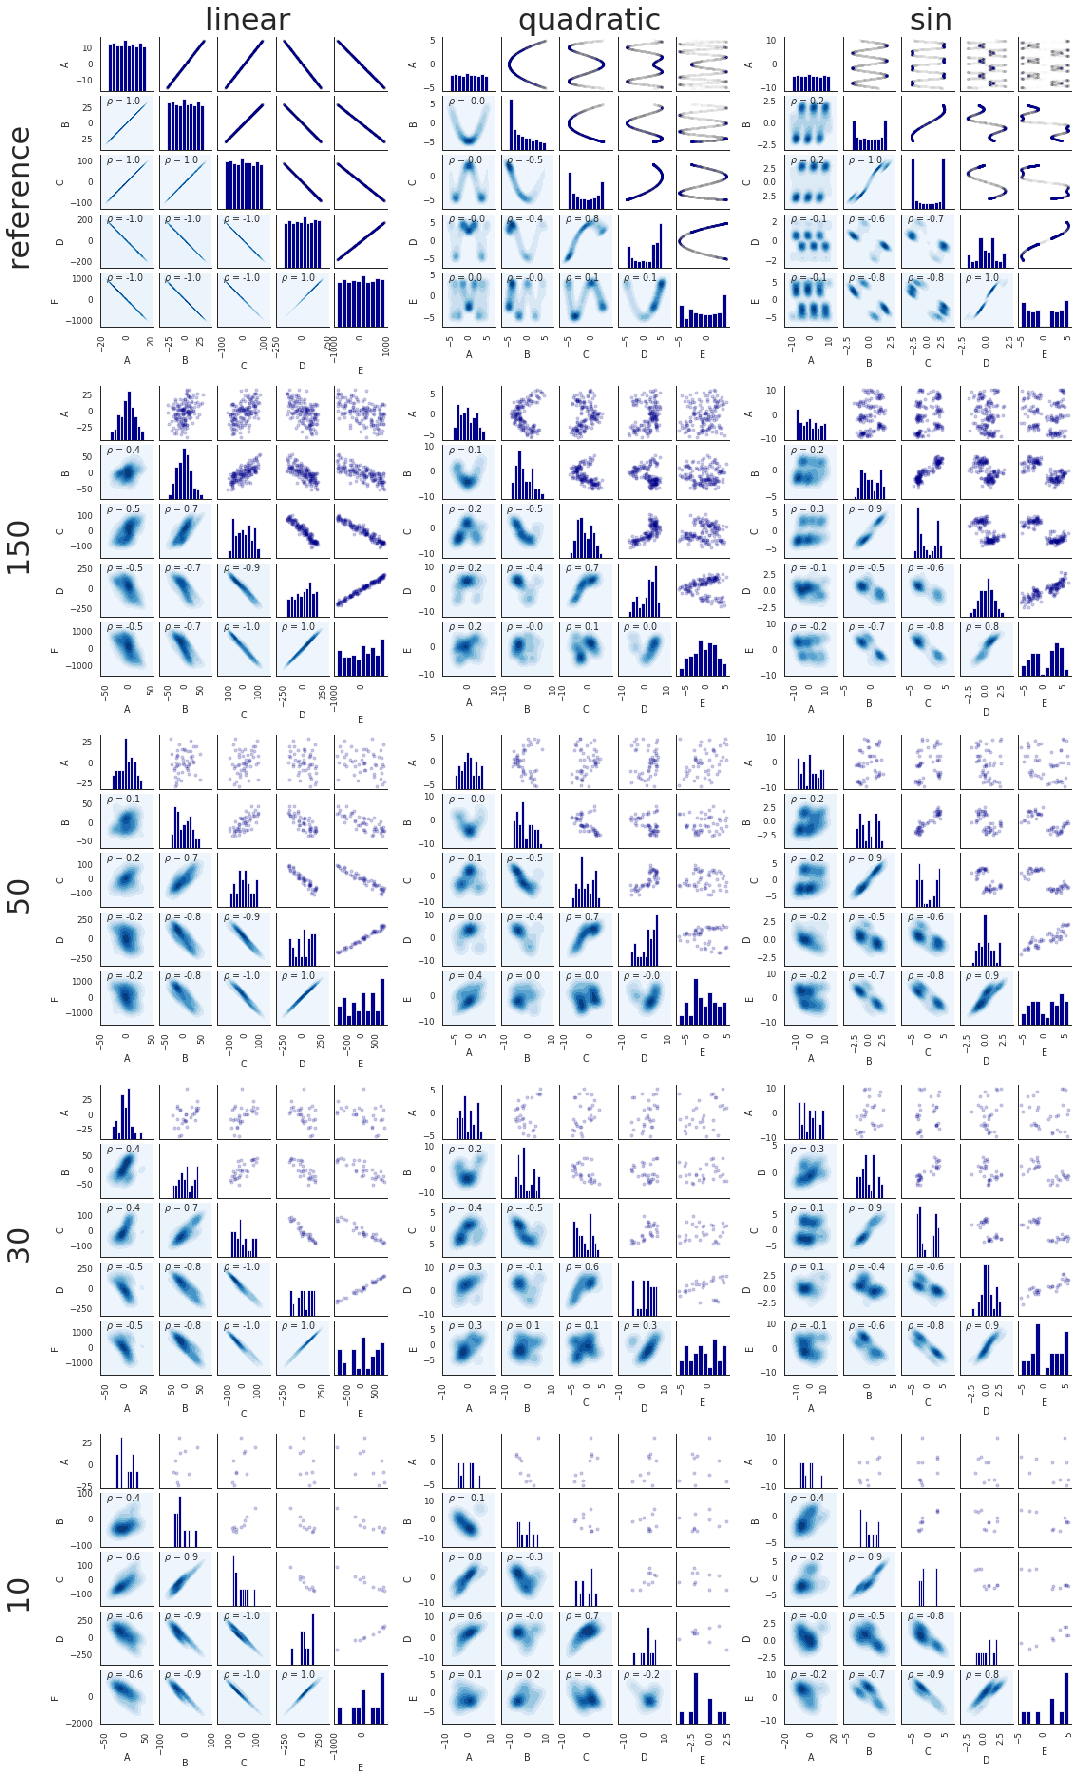

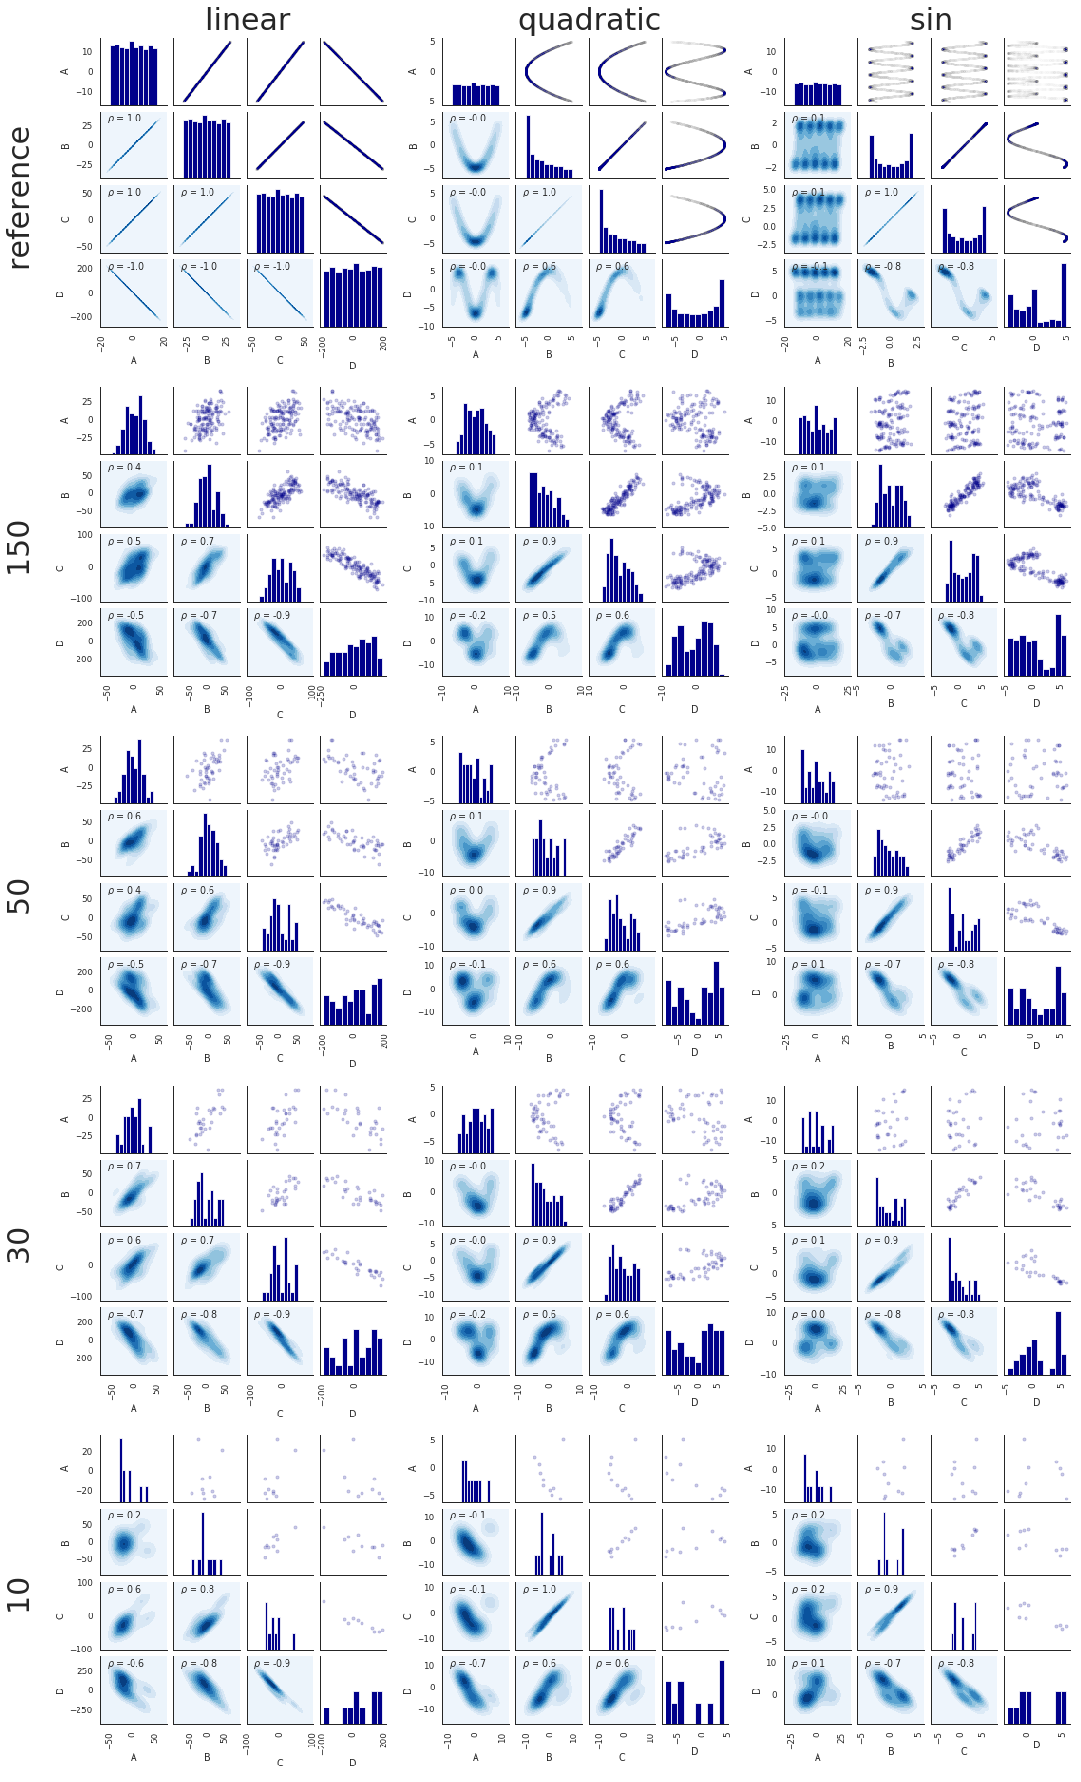

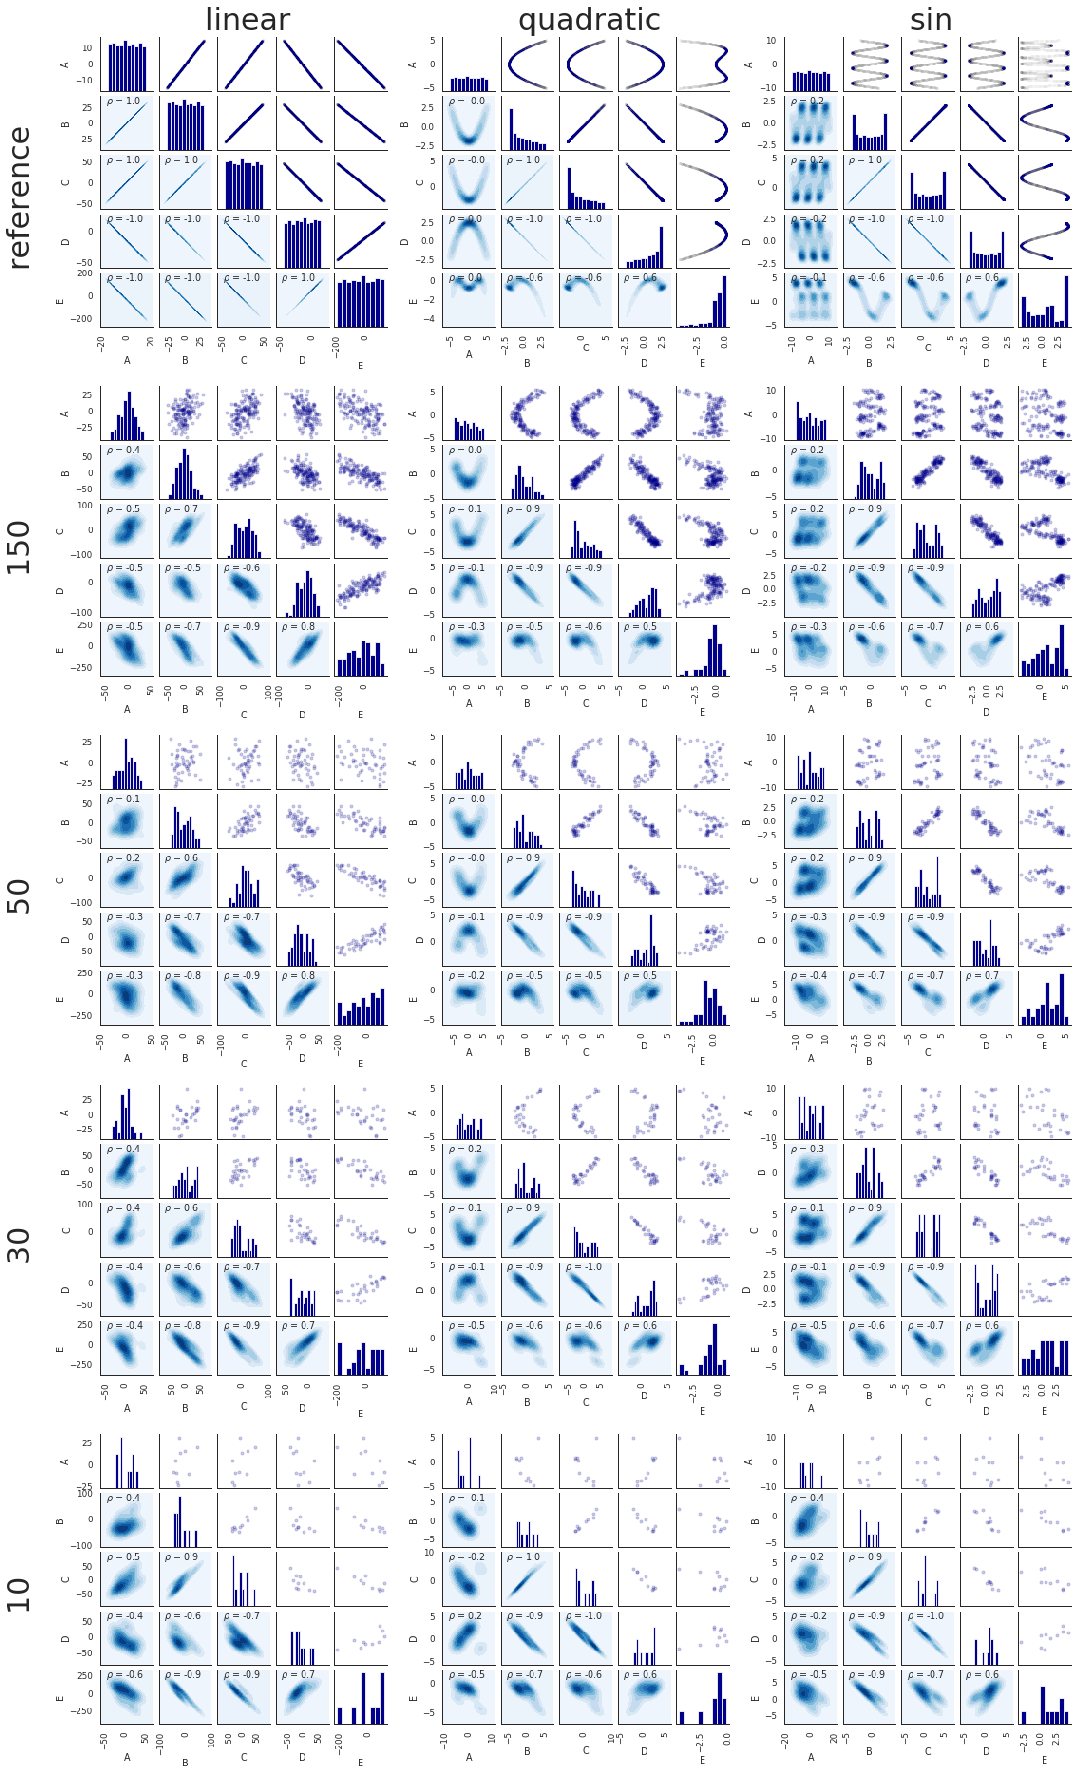

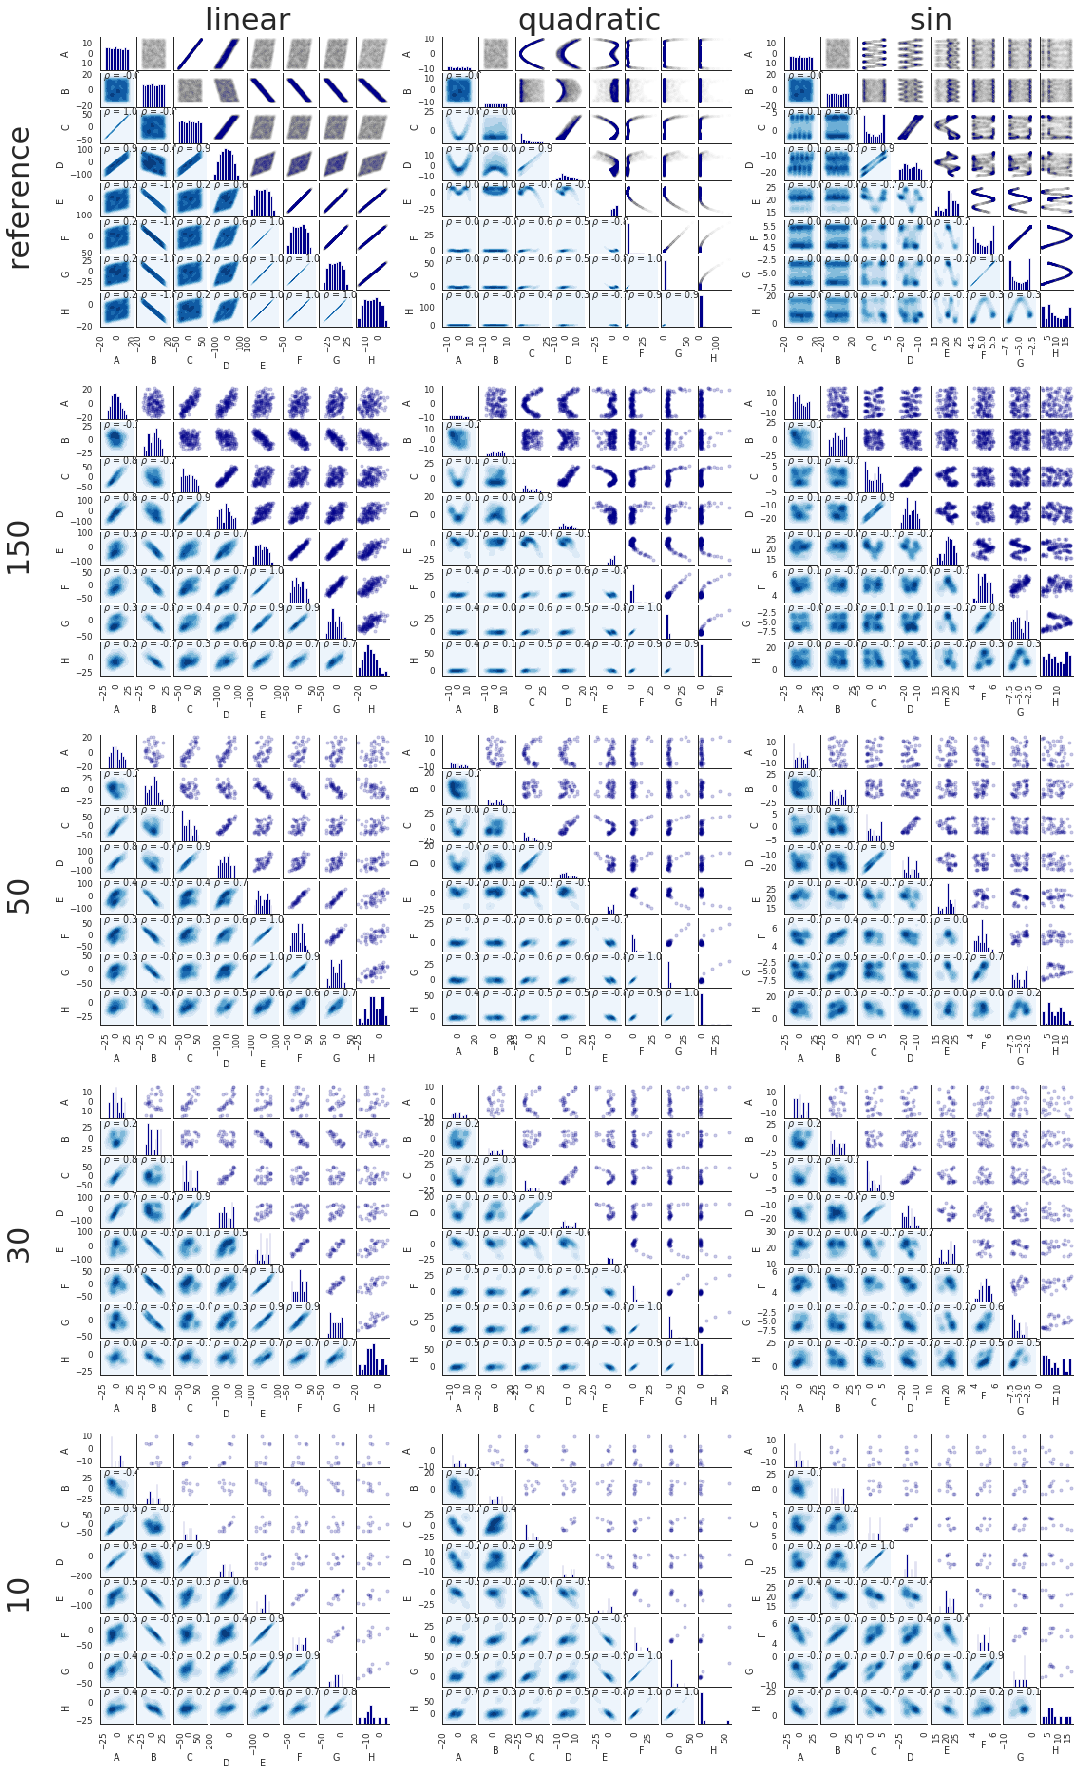

In [56]:
for net in [1, 2, 3, 4]:
    fig, axes = plt.subplots(5, 3, figsize=(15, 25))
    for i, samples in enumerate([10, 30, 50, 150, "reference"][::-1]):
        for j, parametrization in enumerate(["linear", "quadratic", "sin"]):
            network = f"net{net}-{samples}-{parametrization}"
            im = mpimg.imread(where_data + "plots/" + network + ".png")
            axes[i, j].imshow(im)
            axes[i, j].set_xticklabels([])
            axes[i, j].set_yticklabels([])
            axes[i, j].spines['top'].set_visible(False)
            axes[i, j].spines['right'].set_visible(False)
            axes[i, j].spines['bottom'].set_visible(False)
            axes[i, j].spines['left'].set_visible(False)
            if j == 0:
                axes[i, j].set_ylabel(f"  {samples}", size=30)
            if i == 0:
                axes[i, j].set_title(f"      {parametrization}", size=30)


    plt.subplots_adjust(wspace=0, hspace=0, bottom=0, top=0.97, left=0.05, right=1)
    plt.axis('off')
    plt.savefig(where_data + "plots/summary_net" + str(net) + ".png")

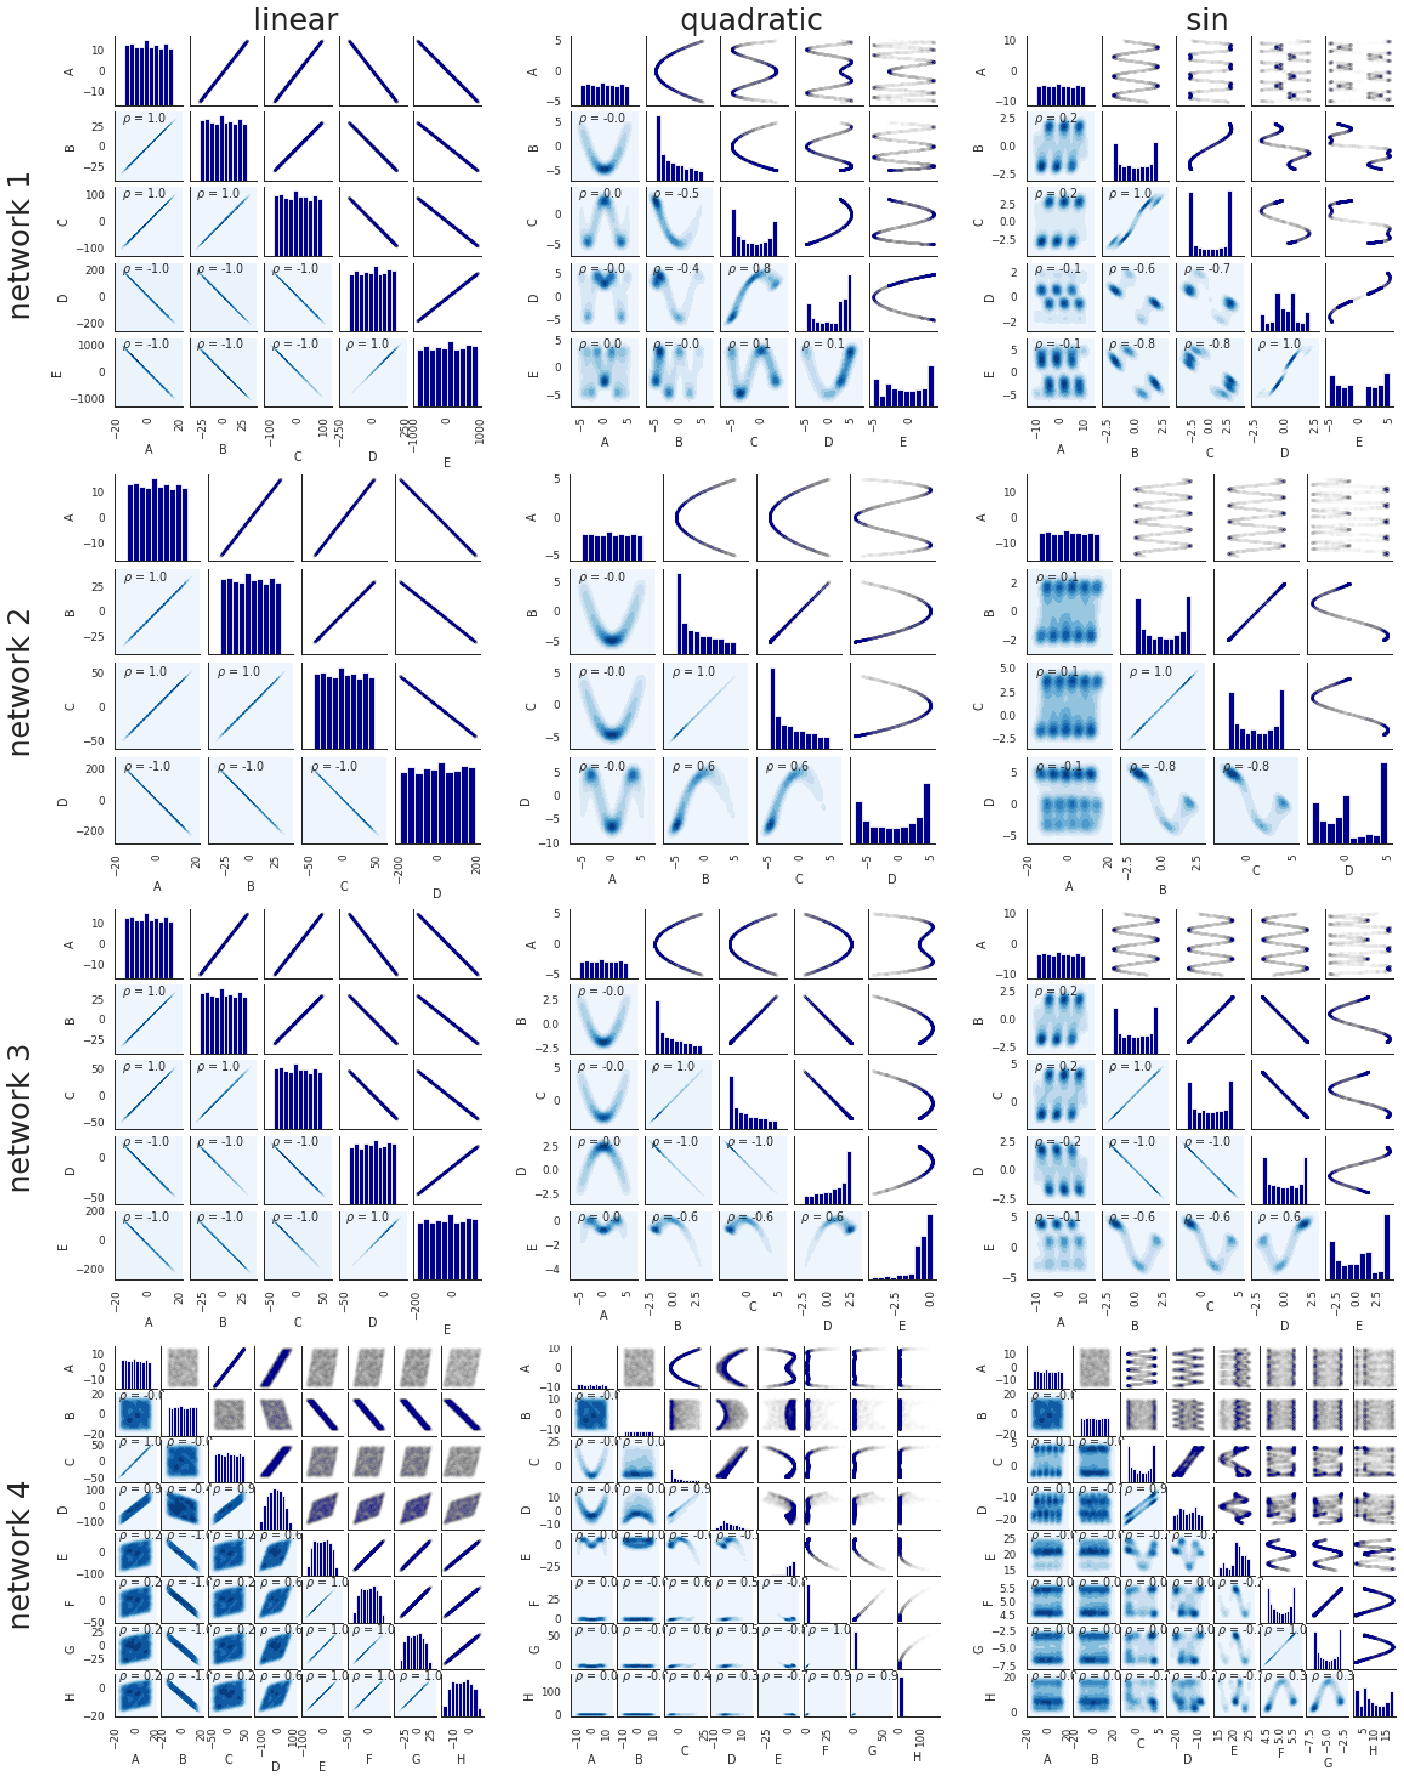

In [60]:
fig, axes = plt.subplots(4, 3, figsize=(20, 25))
for i, net in enumerate([1, 2, 3, 4]):
    samples = "reference"
    for j, parametrization in enumerate(["linear", "quadratic", "sin"]):
        network = f"net{net}-{samples}-{parametrization}"
        im = mpimg.imread(where_data + "plots/" + network + ".png")
        axes[i, j].imshow(im)
        axes[i, j].set_xticklabels([])
        axes[i, j].set_yticklabels([])
        axes[i, j].spines['top'].set_visible(False)
        axes[i, j].spines['right'].set_visible(False)
        axes[i, j].spines['bottom'].set_visible(False)
        axes[i, j].spines['left'].set_visible(False)
        if j == 0:
            axes[i, j].set_ylabel(f"  network {net}", size=30)
        if i == 0:
            axes[i, j].set_title(f"      {parametrization}", size=30)


plt.subplots_adjust(wspace=0, hspace=0, bottom=0, top=0.97, left=0.05, right=1)
plt.axis('off')
plt.savefig(where_data + "plots/reference_networks.png")